# 短時間フーリエ変換とスペクトログラム
音声に短時間フーリエ変換（Short-Time Fourier Transform; STFT）を適用して，スペクトログラムを出力しましょう．

## はじめに
必要なライブラリをimportします．
- librosa[[document](https://librosa.org/doc/latest/index.html)]
  - 音声・音楽関連の処理が実装されたライブラリ
  - 塩田研に入ったら使わない人はいないレベルなので，ぜひ覚えて帰ってください．
- matplotlib[[document](https://matplotlib.org/stable/index.html)]
  - pythonにおけるグラフプロットのデファクト
  - matlabライクな記法なので覚えることが少ない
- numpy
  - 数値計算ライブラリ
- pathlib
  - ファイルパスを扱うライブラリ

In [1]:
import librosa
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


## 音声の読み込み
今はとりあえずJ-SPaWという研究室で作成したデータセットの音声を参照しています．

自分で収録した音声でも試してみましょう！


In [2]:
# 音声ファイルのパスを指定．自分の音声を使っても可．
filename = "J-SPaW_sample.wav"
file_path = Path("audiofile", filename)

# 音声の読み込み
data, sr = librosa.load(file_path, sr=16000)

print(f"Sampling rate: {sr}\nData shape: {data.shape}\nData array: {data}")

Sampling rate: 16000
Data shape: (46336,)
Data array: [-0.0005188  -0.00079346 -0.00134277 ...  0.00076294  0.00109863
  0.00158691]


## STFTとスペクトログラム
`stft_params`を適宜変えて挙動の違いを確認しましょう．

> 今，`hop_length`, `win_length`はNoneとなっていますが，このとき[librosa.stft()](https://librosa.org/doc/0.11.0/generated/librosa.stft.html)の内部処理ではどのような値としてSTFTが行われるでしょうか？

In [3]:
# stft config
stft_params = {
    "n_fft": 2048,
    "hop_length": 512,
    "win_length": 256,
    "window": "hann",
}

# stft
D = librosa.stft(
    data,
    **stft_params,
)

# check result
print(f"Shape of STFT result: {D.shape}")
print(f"Value type: {D.dtype}")


Shape of STFT result: (1025, 91)
Value type: complex64


このままでは下のセルは動かないので，上のセルの`stft_params`の`hop_length`, `win_length`をNone以外に変えて動かしてみましょう．

> y軸のスケールは`linear`ですが，他にどのようなスケールに変更可能でしょうか？また，それらはどのような特性がありますか？ 参考:[librosa.specshow()](https://librosa.org/doc/0.11.0/generated/librosa.display.specshow.html)

Text(0.5, 1.0, 'Spectrogram of J-SPaW_sample.wav, hann-window, ')

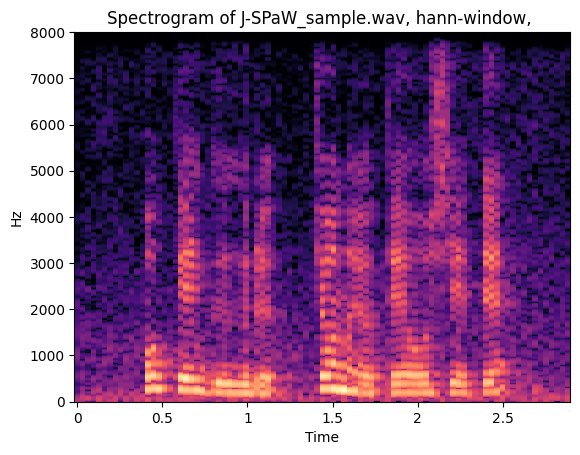

In [ ]:
# 複素表現を振幅表現（実数）に変換
D_amp = np.abs(D)
# dBに変換
D_mag = librosa.amplitude_to_db(D_amp, ref=np.max)

# spectrogram config
spec_params = {
    "sr": sr,
    "hop_length": stft_params["hop_length"],
    "win_length": stft_params["win_length"],
    "n_fft": stft_params["n_fft"],
    "y_axis": "linear",
    "x_axis": "time",
}

# show spectrogram
librosa.display.specshow(D_mag, **spec_params)
plt.title(f"Spectrogram of {filename}, {stft_params['window']}-window, ")